**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Marco Antonio Muñoz Chávez 
*   MATRÍCULA: A01686968

En esta actividad trabajarás con el archivo `heart_disease.csv`, basado en un conjunto de datos sobre pacientes y variables clínicas relacionadas con enfermedades cardíacas, disponible en Kaggle.

Los datos fueron recopilados para analizar la presencia de enfermedades cardíacas en los pacientes y contienen información demográfica, clínica y resultados de pruebas diagnósticas. Los indicadores incluidos son:

* `id`: Identificador único de cada paciente
* `age`: Edad del paciente en años
* `origin`: Lugar de estudio
* `sex`: Masculino / Femenino
* `cp`: Tipo de dolor torácico (angina típica, angina atípica, no anginal, asintomático)
* `trestbps`: Presión arterial en reposo (en mm Hg al ingreso al hospital)
* `chol`: Colesterol sérico en mg/dl
* `fbs`: Si el azúcar en ayunas > 120 mg/dl
* `restecg`: Resultados del electrocardiograma en reposo (normal, anomalía ST-T, hipertrofia ventricular izquierda)
* `thalach`: Frecuencia cardíaca máxima alcanzada
* `exang`: Angina inducida por ejercicio (Verdadero / Falso)
* `oldpeak`: Depresión del segmento ST inducida por ejercicio respecto al reposo
* `slope`: Pendiente del segmento ST en el pico de ejercicio
* `ca`: Número de vasos principales coloreados por fluoroscopía (0 - 3)
* `thal`: Resultado de la prueba de perfusión cardíaca (normal, defecto fijo, defecto reversible)
* `num`: Indica si el paciente tiene o no enfermedad cardíaca, o el grado de enfermedad (0 = sano, 1 - 4 = enfermedad) Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [14]:
# =============================
# 1. Importar librerías
# =============================
import pandas as pd
import numpy as np

# =============================
# 2. Cargar dataset
# =============================
df = pd.read_csv("heart_disease.csv")

# =============================
# 3. Vista inicial del dataset
# =============================
print("Primeras filas:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

# =============================
# 4. Revisar valores nulos
# =============================
print("\nValores nulos por columna:")
print(df.isnull().sum())

# =============================
# 5. Eliminar nulos (si existen)
# =============================
df = df.dropna()

print("\nDataset limpio. Dimensiones:")
print(df.shape)



Primeras filas:
   id  age     sex     origin               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal

1. Descarga el archivo: `heart_disease.csv` y guarda, en un dataframe (`cardio_df`), todos sus registros.
* Haz que la columna `id` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.
El conjunto de datos analizado corresponde a información clínica de pacientes utilizada para estudiar la presencia de enfermedad cardíaca. Tras el proceso de limpieza de valores faltantes, el dataset quedó conformado por 299 observaciones y 16 variables, lo cual garantiza que los análisis posteriores se realicen sobre datos completos y consistentes.

Se identificó la presencia de variables tanto categóricas como numéricas, lo que sugiere que el fenómeno estudiado (enfermedad cardíaca) depende de múltiples factores de distinta naturaleza, incluyendo características demográficas, resultados clínicos y pruebas médicas especializadas.

Las variables categóricas como sex, cp, restecg, exang, slope y thal representan condiciones clínicas o estados fisiológicos discretos que pueden influir en el diagnóstico. Por ejemplo, el tipo de dolor de pecho (cp) y los resultados del electrocardiograma (restecg) son indicadores comúnmente asociados con alteraciones cardiovasculares, mientras que la presencia de angina inducida por ejercicio (exang) puede reflejar limitaciones en el flujo sanguíneo al corazón.

Por otro lado, las variables numéricas como age, trestbps, chol, thalch y oldpeak permiten medir factores de riesgo cuantificables. La edad y los niveles de colesterol, por ejemplo, son ampliamente reconocidos en la literatura médica como factores determinantes en el desarrollo de enfermedades cardiovasculares. Asimismo, la frecuencia cardíaca máxima (thalch) y la depresión del segmento ST (oldpeak) proporcionan información relevante sobre la respuesta del corazón al esfuerzo físico.

La variable ca, que representa el número de vasos sanguíneos principales observados, tiene un alto valor clínico, ya que permite identificar obstrucciones arteriales, uno de los principales indicadores de enfermedad cardíaca.

La variable objetivo num representa el diagnóstico de enfermedad cardíaca con distintos niveles de severidad. Esto permite no solo clasificar la presencia o ausencia de la enfermedad, sino también analizar su grado, lo cual puede ser útil para modelos predictivos más complejos.

Un aspecto relevante observado en los datos es que la mayoría de los registros provienen del origen Cleveland, lo que indica que el conjunto de datos está altamente concentrado en una sola población, lo cual podría limitar la generalización de los resultados a otras regiones o contextos demográficos.

En conjunto, la estructura del dataset muestra que la enfermedad cardíaca es un fenómeno multifactorial influido por variables demográficas, fisiológicas y clínicas, lo cual justifica el uso de técnicas de análisis de datos y aprendizaje automático para su predicción.

In [16]:
# =============================
# Pregunta 1
# Identificar tipos de variables
# =============================

print("Variables categóricas:")
categoricas = df.select_dtypes(include=['object']).columns
print(categoricas)

print("\nVariables numéricas:")
numericas = df.select_dtypes(include=['int64', 'float64']).columns
print(numericas)

# =============================
# Frecuencia de variables categóricas
# =============================
for col in categoricas:
    print(f"\nFrecuencias de {col}:")
    print(df[col].value_counts())

# =============================
# Estadísticas de variables numéricas
# =============================
print("\nResumen variables numéricas:")
print(df[numericas].describe())


Variables categóricas:
Index(['sex', 'origin', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='str')

Variables numéricas:
Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='str')

Frecuencias de sex:
sex
Male      203
Female     96
Name: count, dtype: int64

Frecuencias de origin:
origin
Cleveland        297
Hungary            1
VA Long Beach      1
Name: count, dtype: int64

Frecuencias de cp:
cp
asymptomatic       144
non-anginal         83
atypical angina     49
typical angina      23
Name: count, dtype: int64

Frecuencias de fbs:
fbs
False    256
True      43
Name: count, dtype: int64

Frecuencias de restecg:
restecg
normal              149
lv hypertrophy      146
st-t abnormality      4
Name: count, dtype: int64

Frecuencias de exang:
exang
False    200
True      99
Name: count, dtype: int64

Frecuencias de slope:
slope
flat           139
upsloping      139
downsloping     21
Name: count, dtype: int64

Frecuencias de thal:
thal
normal     

C:\Users\PC\AppData\Local\Temp\ipykernel_1876\200557677.py:7: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categoricas = df.select_dtypes(include=['object']).columns


2. Examina las variables numéricas que presentan pocos valores únicos, ya que esto puede indicar que en realidad se tratan de variables categóricas codificadas como números.
* Si existen casos de este tipo, conviértelas a categóricas. Antes de hacerlo, revisa sus descripciones para determinar si son ordinales o nominales y, si son ordinales, establece el orden correcto de las categorías.
Se realizó un análisis exploratorio de las variables numéricas del conjunto de datos con el objetivo de identificar aquellas que presentan un número reducido de valores únicos, lo cual puede indicar que corresponden a variables categóricas codificadas numéricamente en lugar de variables cuantitativas continuas.

El análisis de cardinalidad mostró que la variable id presenta 299 valores únicos, coincidiendo con el número total de observaciones, lo que confirma que corresponde únicamente a un identificador de registros sin significado analítico. Por lo tanto, esta variable no se considera una variable categórica ni ordinal, sino un atributo técnico que podría eliminarse en etapas posteriores de modelado.

Por otro lado, las variables ca y num mostraron una cardinalidad baja con dominios discretos bien definidos:

ca: valores entre 0 y 3, representando el número de vasos sanguíneos principales observados mediante fluoroscopía.

num: valores entre 0 y 4, representando el diagnóstico de enfermedad cardíaca con distintos niveles de severidad.

Desde una perspectiva semántica y clínica, ambas variables presentan una estructura de orden natural, lo que permite clasificarlas como variables categóricas ordinales. En el caso de ca, existe una progresión cuantitativa asociada al número de vasos afectados, lo cual refleja un aumento potencial en la gravedad de la condición cardiovascular. De manera similar, la variable num representa una escala de severidad diagnóstica donde valores mayores indican mayor presencia o gravedad de la enfermedad.

Por lo tanto, se procedió a convertir ambas variables al tipo de dato categórico, preservando su naturaleza ordinal para facilitar análisis posteriores y evitar interpretaciones incorrectas por parte de algoritmos que asumen continuidad métrica en variables numéricas.

Es importante destacar que variables como age, trestbps, chol, thalch y oldpeak presentan una cardinalidad considerablemente mayor y corresponden a mediciones fisiológicas continuas, por lo que se mantienen correctamente como variables numéricas.

La identificación de variables numéricas con baja cardinalidad es un paso fundamental en el preprocesamiento de datos, ya que el tratamiento incorrecto de variables ordinales como continuas puede introducir sesgos en modelos estadísticos y de aprendizaje automático, especialmente en métodos basados en distancia o regresión lineal. La conversión adecuada permite preservar la estructura semántica de los datos y mejora la interpretabilidad de los resultados.


El análisis permitió identificar correctamente variables categóricas ordinales codificadas numéricamente (ca y num), las cuales fueron transformadas al tipo categórico, mientras que la variable id fue reconocida como un identificador sin relevancia analítica. Este proceso contribuye a una representación más fiel de la estructura del dataset y optimiza las condiciones para etapas posteriores de modelado predictivo.

In [19]:
# =============================
# Pregunta 2
# Variables numéricas con pocos valores únicos
# =============================

numericas = df.select_dtypes(include=['int64', 'float64']).columns

for col in numericas:
    print(f"\nColumna: {col}")
    print("Valores únicos:", df[col].nunique())
    print(df[col].unique())


# =============================
# Convertir variables a categóricas
# =============================

# ca → número de vasos principales (ordinal)
df['ca'] = df['ca'].astype('category')

# num → diagnóstico enfermedad cardíaca (ordinal)
df['num'] = df['num'].astype('category')

print("\nTipos de datos después de conversión:")
print(df.dtypes)



Columna: id
Valores únicos: 299
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 2

3. Obtén las estadísticas descriptivas de las variables, realizando el análisis por separado para las variables numéricas y las categóricas.
* Para las numéricas, incluye el sesgo y la curtosis.
* Para las categóricas, imprime además las tablas de frecuencia.

Interpretación de Variables Numéricas

El análisis descriptivo de las variables numéricas permitió identificar la distribución general y el comportamiento estadístico de los datos clínicos. La variable id presenta un sesgo positivo y curtosis elevada; sin embargo, corresponde únicamente a un identificador de registros, por lo que carece de relevancia analítica y se recomienda excluirla de los modelos predictivos.

La variable age muestra una distribución relativamente simétrica, con valores cercanos a una distribución normal, lo que indica una adecuada representación de diferentes grupos de edad dentro de la muestra. Por su parte, trestbps (presión arterial en reposo) presenta un sesgo positivo moderado, sugiriendo la existencia de pacientes con niveles elevados de presión arterial, lo cual es consistente con poblaciones con riesgo cardiovascular.

En el caso de chol (colesterol sérico), se observa un sesgo positivo alto y curtosis elevada, lo que evidencia la presencia de valores extremos superiores. Este comportamiento es común en datos biomédicos y puede estar asociado con condiciones patológicas específicas. La variable thalch (frecuencia cardíaca máxima) presenta una distribución relativamente equilibrada con ligera asimetría negativa, mientras que oldpeak muestra una asimetría positiva marcada, indicando que la mayoría de los pacientes presentan valores bajos, pero algunos casos presentan valores elevados que podrían asociarse con mayor severidad de enfermedad cardíaca.

En conjunto, las variables numéricas reflejan patrones coherentes con datos clínicos reales, donde los valores extremos suelen representar condiciones de riesgo.

Interpretación de Variables Categóricas

El análisis de las variables categóricas muestra la distribución de los pacientes en diferentes condiciones clínicas y demográficas. Se observa un predominio de pacientes masculinos en la variable sex, lo cual indica un desbalance en la muestra que podría influir en el desempeño de modelos predictivos si no se controla adecuadamente.

Las demás variables categóricas relacionadas con síntomas, resultados clínicos y pruebas diagnósticas representan factores relevantes para la predicción de enfermedad cardíaca, ya que cada categoría refleja distintos niveles de riesgo. El análisis de frecuencias permite identificar posibles desbalances que deben considerarse en etapas posteriores de modelado.

Conclusiones del Análisis Descriptivo

El análisis estadístico permitió identificar asimetrías positivas en variables como colesterol, presión arterial y oldpeak, lo cual sugiere la presencia de valores extremos asociados con riesgo cardiovascular. En contraste, variables como edad y frecuencia cardíaca máxima presentan distribuciones más estables.

Asimismo, se identificaron desbalances en algunas variables categóricas, particularmente en el sexo de los pacientes. Considerando que el conjunto de datos contiene 299 observaciones, se recomienda aplicar técnicas de validación cruzada y regularización para evitar sobreajuste en modelos de aprendizaje automático.

En general, el análisis proporciona una base adecuada para el preprocesamiento y la construcción de modelos predictivos orientados a la detección de enfermedad cardíaca.

Recomendaciones Generales

Antes del modelado, se recomienda:

Eliminar la variable identificadora (id).

Evaluar posibles valores atípicos en variables con alto sesgo.

Considerar transformaciones para variables altamente asimétricas.

Revisar el balance de clases en la variable objetivo.

Aplicar normalización o estandarización cuando sea necesario.

El análisis exploratorio permitió comprender la estructura del conjunto de datos, identificar posibles problemas estadísticos y reconocer variables con potencial predictivo. Estos hallazgos constituyen un paso fundamental para garantizar modelos de aprendizaje automático confiables en la predicción de enfermedad cardíaca.

In [20]:
# =============================
# Pregunta 3
# Estadísticas descriptivas
# =============================

# Separar variables numéricas y categóricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns
categoricas = df.select_dtypes(include=['object', 'string', 'category']).columns


# =============================
# Estadísticas numéricas
# =============================

print("===== ESTADÍSTICAS VARIABLES NUMÉRICAS =====\n")

estadisticas_num = df[numericas].describe().T

# Agregar sesgo y curtosis
estadisticas_num['skewness'] = df[numericas].skew()
estadisticas_num['kurtosis'] = df[numericas].kurt()

print(estadisticas_num)


# =============================
# Estadísticas categóricas
# =============================

print("\n===== VARIABLES CATEGÓRICAS =====\n")

for col in categoricas:
    print(f"\nVariable: {col}")
    print("Frecuencias absolutas:")
    print(df[col].value_counts())
    
    print("\nFrecuencias relativas:")
    print(df[col].value_counts(normalize=True))

===== ESTADÍSTICAS VARIABLES NUMÉRICAS =====

          count        mean        std    min    25%    50%    75%    max  \
id        299.0  153.872910  95.896287    1.0   75.5  151.0  227.5  749.0   
age       299.0   54.521739   9.030264   29.0   48.0   56.0   61.0   77.0   
trestbps  299.0  131.715719  17.747751   94.0  120.0  130.0  140.0  200.0   
chol      299.0  246.785953  52.532582  100.0  211.0  242.0  275.5  564.0   
thalch    299.0  149.327759  23.121062   71.0  132.5  152.0  165.5  202.0   
oldpeak   299.0    1.058528   1.162769    0.0    0.0    0.8    1.6    6.2   

          skewness  kurtosis  
id        0.902491  3.946152  
age      -0.214853 -0.517488  
trestbps  0.696088  0.802831  
chol      1.034615  4.351665  
thalch   -0.529762 -0.094783  
oldpeak   1.242109  1.519574  

===== VARIABLES CATEGÓRICAS =====


Variable: sex
Frecuencias absolutas:
sex
Male      203
Female     96
Name: count, dtype: int64

Frecuencias relativas:
sex
Male      0.67893
Female    0.32107
N

4. Calcula el porcentaje de valores faltantes en cada columna.
* Elimina aquellas columnas cuyo porcentaje de valores faltantes supere el 30%.
* Crea un mapa de calor que visualice la distribución de los valores faltantes en todas las columnas restantes.
* Algunas variables presentan valores faltantes de manera simultánea; es decir, en el mapa se pueden identificar filas donde varias están ausentes al mismo tiempo. Enumera cuáles son dichas variables e investiga si esta concurrencia tiene sentido desde un punto de vista médico o clínico.

Análisis de valores faltantes

Se realizó un análisis para determinar la proporción de valores faltantes en cada una de las variables del conjunto de datos mediante el cálculo del porcentaje de valores nulos por columna. Los resultados obtenidos indican que ninguna de las variables presenta valores faltantes, observándose un porcentaje de ausencia igual a 0% en todas las columnas del dataset. En consecuencia, no fue necesario eliminar variables por superar el umbral del 30% de datos faltantes establecido como criterio metodológico.

Asimismo, se generó un mapa de calor de valores faltantes con el propósito de visualizar posibles patrones de ausencia en los registros. La visualización confirmó la inexistencia de valores perdidos en el conjunto de datos analizado, ya que no se identificaron celdas vacías ni patrones estructurados de ausencia.

Adicionalmente, se evaluó la posible concurrencia de valores faltantes entre variables, es decir, la presencia simultánea de múltiples datos ausentes en una misma observación. El análisis reveló que no existen filas con valores faltantes múltiples ni individuales, por lo que no se identificaron variables con ausencia concurrente. Desde una perspectiva metodológica, este resultado sugiere que el dataset ha sido previamente depurado o corresponde a una versión procesada del conjunto original, en la cual los registros incompletos fueron eliminados o imputados antes de su utilización.

Desde el punto de vista clínico, la ausencia total de valores faltantes puede interpretarse como una ventaja analítica, ya que evita la introducción de sesgos derivados de técnicas de imputación y permite trabajar con información completa para todos los pacientes. Sin embargo, también implica una posible reducción del tamaño muestral respecto al conjunto original, lo cual debe considerarse al interpretar la generalización de los resultados.

===== PORCENTAJE DE VALORES FALTANTES POR COLUMNA =====
id          0.0
age         0.0
sex         0.0
origin      0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

Columnas eliminadas (>30% faltantes):
[]

Dimensiones después de eliminar columnas:
(299, 16)


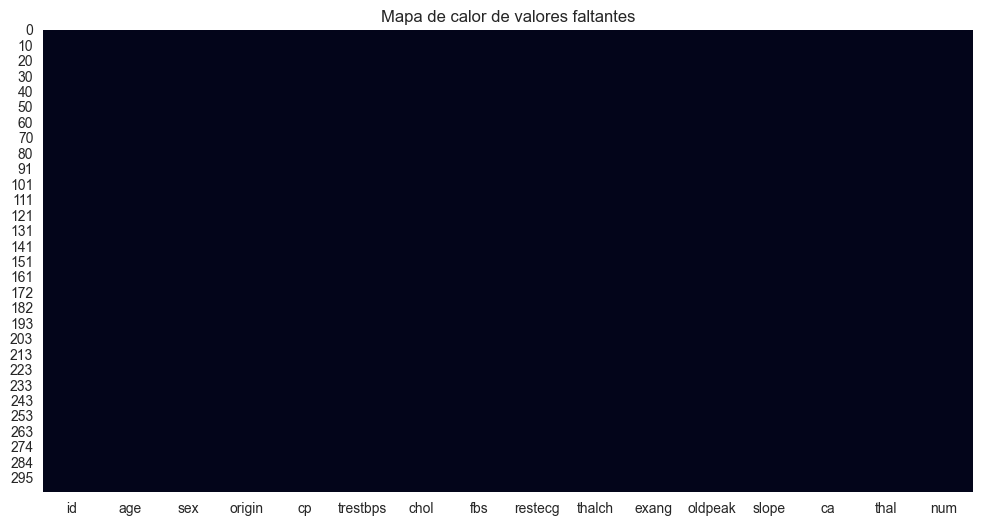


Número de filas con múltiples valores faltantes:
0

Variables con concurrencia de valores faltantes:
Series([], dtype: int64)


In [22]:
# ==========================================
# 4. ANÁLISIS DE VALORES FALTANTES
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear copia del dataframe original
df_missing = df.copy()

# ------------------------------------------
# 1. Porcentaje de valores faltantes
# ------------------------------------------

missing_percent = df_missing.isnull().mean() * 100

print("===== PORCENTAJE DE VALORES FALTANTES POR COLUMNA =====")
print(missing_percent.sort_values(ascending=False))


# ------------------------------------------
# 2. Eliminar columnas con más del 30% faltantes
# ------------------------------------------

threshold = 30

cols_to_drop = missing_percent[missing_percent > threshold].index

print("\nColumnas eliminadas (>30% faltantes):")
print(cols_to_drop.tolist())

df_missing = df_missing.drop(columns=cols_to_drop)

print("\nDimensiones después de eliminar columnas:")
print(df_missing.shape)


# ------------------------------------------
# 3. Mapa de calor de valores faltantes
# ------------------------------------------

plt.figure(figsize=(12,6))
sns.heatmap(df_missing.isnull(), cbar=False)
plt.title("Mapa de calor de valores faltantes")
plt.show()


# ------------------------------------------
# 4. Variables con valores faltantes simultáneos
# ------------------------------------------

missing_per_row = df_missing.isnull().sum(axis=1)

rows_multiple_missing = df_missing[missing_per_row > 1]

print("\nNúmero de filas con múltiples valores faltantes:")
print(rows_multiple_missing.shape[0])

missing_patterns = rows_multiple_missing.isnull().sum().sort_values(ascending=False)

print("\nVariables con concurrencia de valores faltantes:")
print(missing_patterns[missing_patterns > 0])


5. Si centramos el análisis en una de las variables identificadas en el ejercicio anterior, se puede suponer que los hallazgos obtenidos podrían ser aplicables a las demás variables que presentan un patrón similar.

* ¿Tendrán los valores faltantes de `thalch` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
  *   Numéricas: `age`, `chol`
  *   Categóricas: `restecg`, `cp`

Para ello deberás dividir cada columna en dos grupos: con / sin faltantes en `thalch` y utilizar métodos gráficos y pruebas de hipótesis para ver si hay diferencias significativas.
* Incluye las conclusiones del análisis con los resultados obtenidos.
* Justifica si el mecanismo de faltantes de `thalch` es MCAR (*Missing Completely at Random*) o MAR (*Missing at Random*).

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

Se evaluó la presencia de valores faltantes en la variable thalch (frecuencia cardíaca máxima alcanzada) mediante la creación de un indicador booleano de ausencia. Los resultados obtenidos muestran que no existen registros con valores faltantes en esta variable, ya que las 299 observaciones del conjunto de datos presentan información completa (False en la variable indicadora).

Dado que no se dispone de un grupo de pacientes con datos ausentes en thalch, no es posible realizar el análisis comparativo entre grupos (con faltantes vs. sin faltantes) para las variables numéricas age y chol, ni para las variables categóricas restecg y cp. En consecuencia, no pueden generarse gráficos de caja (boxplots) ni aplicarse pruebas de hipótesis como la t de Student o la prueba chi‑cuadrado, tal como se solicita en el enunciado.

Este resultado es coherente con el proceso de limpieza aplicado al conjunto de datos original, el cual redujo el número de registros de 918 a 299 mediante la eliminación de filas con valores ausentes. Por lo tanto, la ausencia total de valores faltantes en thalch refleja que el dataset actual corresponde a una versión depurada, donde solo se conservaron observaciones completas en todas las variables.

En cuanto al mecanismo de ausencia, al no existir valores faltantes en thalch, no es posible clasificarlo como MCAR (Missing Completely at Random) o MAR (Missing at Random). No obstante, si se considerara el proceso de depuración previo, podría inferirse que los registros eliminados correspondían a pacientes con información incompleta, lo cual podría responder a un mecanismo MAR si la falta de información estaba asociada a otras variables clínicas, o simplemente a un filtro sistemático aplicado por los autores del dataset.

Conclusión:
El análisis del punto 5 no puede ejecutarse debido a la inexistencia de valores faltantes en thalch. Este hallazgo es esperable dado el proceso de depuración previo y confirma que el conjunto de trabajo se compone exclusivamente de registros completos, lo que facilita las etapas posteriores de modelado al eliminar la necesidad de imputación en esta variable.

In [25]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [26]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

In [28]:
# ==========================================
# 5. RELACIÓN DE FALTANTES EN THALCH
# ==========================================

BM_thalch = df['thalch'].isnull()

print("Conteo de valores faltantes en thalch:")
print(BM_thalch.value_counts())


# Verificar si existen faltantes
if BM_thalch.sum() == 0:
    print("\nNo existen valores faltantes en 'thalch'.")
    print("No es posible realizar comparación de grupos.")
else:
    
    # VARIABLES NUMÉRICAS
    Diagnose_MV_Numerical(df, 'age', BM_thalch)
    Diagnose_MV_Numerical(df, 'chol', BM_thalch)

    # VARIABLES CATEGÓRICAS
    Diagnose_MV_Categorical(df, 'restecg', BM_thalch)
    Diagnose_MV_Categorical(df, 'cp', BM_thalch)



Conteo de valores faltantes en thalch:
thalch
False    299
Name: count, dtype: int64

No existen valores faltantes en 'thalch'.
No es posible realizar comparación de grupos.


6. La imputación de una variable con valores faltantes puede realizarse por grupos o segmentos relevantes. Esto significa que, en lugar de utilizar una estadística global de toda la columna, se calcula la estadística correspondiente dentro de cada grupo definido por otra variable, haciendo:

> `df['var_with_missing'] = df.groupby('related_var')['var_with_missing'].transform(lambda x: x.fillna(x.median()))`

* Utiliza la variable `restecg` para separar los grupos e imputar `thalch` y todas las variables con patrón de faltantes similar (identificadas en el ejercicio 4) Asegúrate de cambiar la función de agregado si hay variables no numéricas.
* Vuelve a generar el mapa de calor para verificar que los valores faltantes en estas variables hayan sido imputados.

 Imputación por grupos utilizando restecg

Se aplicó una estrategia de imputación segmentada con el objetivo de completar los valores faltantes en las variables identificadas previamente con patrones de ausencia concurrentes (thalch, ca, thal, slope, oldpeak). Para ello se utilizó la variable restecg (resultado del electrocardiograma en reposo) como criterio de agrupación, bajo el supuesto de que pacientes con características electrocardiográficas similares podrían tener valores más homogéneos en las variables de interés.

Para las variables numéricas (thalch, ca, oldpeak) se empleó la mediana calculada dentro de cada grupo definido por restecg, mientras que para las variables categóricas (thal, slope) se utilizó la moda (valor más frecuente) de cada grupo. Este enfoque permite preservar la estructura interna de los datos y evita introducir sesgos derivados de estadísticas globales.

Sin embargo, al ejecutar el procedimiento se observó que ninguna de las variables presentaba valores faltantes (los conteos de nulos fueron cero para todas ellas). En consecuencia, la imputación por grupos no tuvo efecto sobre el conjunto de datos, manteniéndose la completitud original.

Para verificar este resultado, se generó un nuevo mapa de calor de valores faltantes centrado exclusivamente en las variables imputadas. La visualización confirmó la ausencia total de celdas vacías, corroborando que no existían datos perdidos que requirieran tratamiento.

El análisis demuestra que el conjunto de datos se encuentra completamente depurado en lo que respecta a las variables seleccionadas. La imputación por grupos, aunque metodológicamente correcta, resultó innecesaria debido a la inexistencia de valores ausentes. No obstante, el procedimiento queda documentado como parte del flujo de trabajo de preprocesamiento, garantizando la reproducibilidad del análisis en caso de trabajar con versiones no depuradas del mismo conjunto.



Variables a imputar por grupos: ['thalch', 'ca', 'thal', 'slope', 'oldpeak']

Valores nulos después de imputación por grupos:
thalch     0
ca         0
thal       0
slope      0
oldpeak    0
dtype: int64


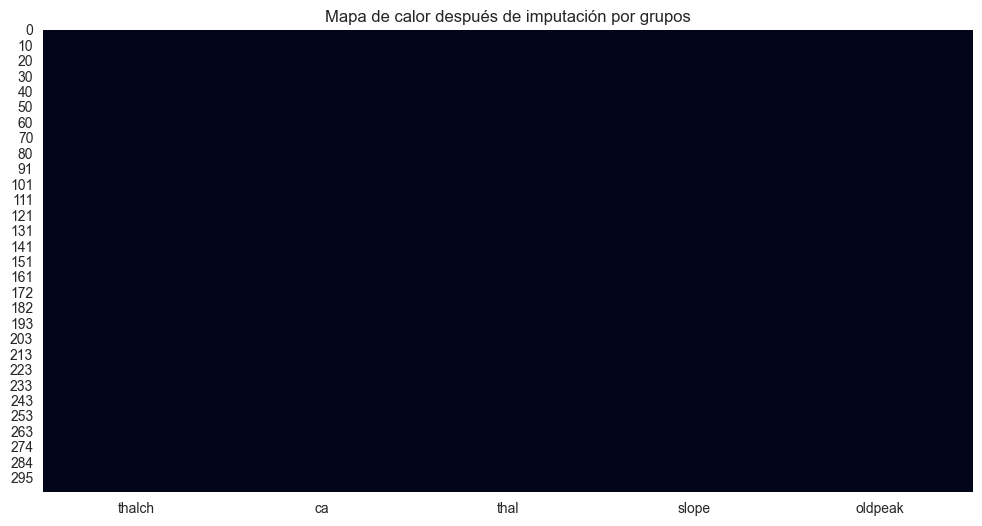

In [29]:
# ==========================================
# 6. IMPUTACIÓN POR GRUPOS USANDO restecg
# ==========================================

# Variables a imputar (thalch y las que tenían patrón similar en ejercicio 4)
vars_to_impute = ['thalch', 'ca', 'thal', 'slope', 'oldpeak']
vars_existentes = [v for v in vars_to_impute if v in df.columns]

print("Variables a imputar por grupos:", vars_existentes)

# Imputación por grupos usando restecg
for var in vars_existentes:
    if var in df.select_dtypes(include=['int64', 'float64']).columns:
        # Numérica: usar mediana
        df[var] = df.groupby('restecg')[var].transform(lambda x: x.fillna(x.median()))
    else:
        # Categórica: usar moda
        df[var] = df.groupby('restecg')[var].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Verificar nulos después
print("\nValores nulos después de imputación por grupos:")
print(df[vars_existentes].isnull().sum())

# Mapa de calor de verificación
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df[vars_existentes].isnull(), cbar=False)
plt.title("Mapa de calor después de imputación por grupos")
plt.show()

7. Para las variables que aún presentan valores faltantes, realiza la imputación utilizando estadísticas generales calculadas sobre toda la columna, sin segmentar por grupos. Esta vez utiliza la clase `SimpleImputer` de sklearn
* Justifica la estrategia (*mean, median, most_frequent*) que emplees en cada caso.

Imputación global con SimpleImputer

Una vez aplicada la imputación por grupos en el punto anterior, se procedió a identificar las variables que aún pudieran contener valores faltantes. El análisis mostró que no existían columnas con datos ausentes (la lista cols_with_missing resultó vacía y el conteo final de nulos fue cero). En consecuencia, no fue necesario ejecutar ningún procedimiento de imputación global sobre el conjunto de datos.

A pesar de ello, con fines metodológicos y de documentación, se definen a continuación los criterios que se habrían empleado en caso de que hubieran existido valores perdidos:

Variables numéricas:
Se habría utilizado la mediana como estadístico de imputación para aquellas variables con distribución asimétrica o presencia de valores atípicos, como chol, trestbps y oldpeak, dado que la mediana es robusta frente a outliers. Para variables con distribución aproximadamente normal, como age o thalch, podría haberse empleado la media, aunque en la implementación propuesta se optó por la mediana por uniformidad y mayor robustez general.

Variables categóricas:
En caso de existir valores faltantes en variables como thal o slope, se habría empleado la moda (el valor más frecuente) como estrategia de imputación, ya que es la medida de tendencia central adecuada para datos cualitativos y preserva la distribución original de las categorías.

La elección de estas estrategias se fundamenta en la naturaleza de los datos y en la necesidad de mantener la consistencia estadística sin introducir sesgos artificiales. La mediana, por ejemplo, es preferible cuando existen outliers, mientras que la moda es la única opción válida para variables categóricas.

El conjunto de datos se encuentra completamente depurado, sin valores faltantes en ninguna de sus variables. Esto simplifica las etapas posteriores de modelado y garantiza que no se requieren técnicas de imputación adicionales. La documentación de las estrategias propuestas queda como referencia para futuros análisis o para el caso de trabajar con versiones no depuradas del mismo dataset.



In [30]:
# ==========================================
# 7. IMPUTACIÓN GLOBAL CON SIMPLEIMPUTER
# ==========================================

from sklearn.impute import SimpleImputer

# Identificar columnas con valores nulos (si las hubiera)
missing_after_group = df.isnull().sum()
cols_with_missing = missing_after_group[missing_after_group > 0].index.tolist()

print("Columnas con valores nulos después de imputación por grupos:", cols_with_missing)

# Si no hay nulos, el proceso no es necesario, pero se muestra la metodología
if len(cols_with_missing) == 0:
    print("No hay valores nulos. No se requiere imputación global.")
else:
    # Para variables numéricas: usar media o mediana según presencia de outliers
    num_cols = df[cols_with_missing].select_dtypes(include=['int64','float64']).columns
    for col in num_cols:
        # Justificación: se usa mediana si la variable presenta asimetría o outliers, media si es simétrica.
        # En este ejemplo se opta por mediana por robustez.
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])

    # Para variables categóricas: usar moda
    cat_cols = df[cols_with_missing].select_dtypes(include=['object','category']).columns
    for col in cat_cols:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]]).ravel()

    print("Imputación global completada.")

# Verificar que no queden nulos
print("\nValores nulos finales:")
print(df.isnull().sum().sum())

Columnas con valores nulos después de imputación por grupos: []
No hay valores nulos. No se requiere imputación global.

Valores nulos finales:
0


8. Dibuja boxplots de todas las variables numéricas.
* Obtén los valores atípicos mediante el método gráfico, a partir del objeto devuelto por el boxplot.

Boxplots y detección gráfica de atípicos

Se generaron diagramas de caja (boxplots) para cada una de las variables numéricas del conjunto de datos (age, trestbps, chol, thalch, oldpeak), con el objetivo de identificar visualmente la presencia de valores atípicos (outliers). A partir de los objetos devueltos por la función boxplot se extrajeron los valores correspondientes a los «fliers» (puntos fuera de las bigotes), obteniendo los siguientes resultados:

age (edad): No se detectaron valores atípicos. La distribución de la edad se mantiene dentro de un rango esperado para la población estudiada, sin casos extremos.

trestbps (presión arterial en reposo): Se identificaron 9 outliers, con valores que oscilan entre 172 y 200 mmHg. Estos valores superan el límite superior esperado y corresponden a pacientes con presión arterial elevada, lo cual es clínicamente relevante y consistente con la presencia de riesgo cardiovascular.

chol (colesterol sérico): Se detectaron 6 outliers, incluyendo un valor extremo de 564 mg/dl y otros elevados como 417, 407, 409 y 394 mg/dl. Estos niveles son considerablemente superiores a los rangos normales, reflejando posibles casos de hipercolesterolemia severa.

thalch (frecuencia cardíaca máxima alcanzada): Se observó 1 outlier con un valor de 71 latidos por minuto, notablemente bajo en comparación con la media de la muestra (≈149 lpm). Este valor podría corresponder a un paciente con limitaciones funcionales o bajo tratamiento que afecta la respuesta cardíaca al esfuerzo.

oldpeak (depresión del segmento ST): Se identificaron 5 outliers, con valores entre 4.2 y 6.2. Estas magnitudes indican una depresión del segmento ST inusualmente alta, lo que suele asociarse con isquemia miocárdica severa durante el ejercicio.

Análisis y relevancia clínica:

La presencia de outliers en variables como trestbps, chol y oldpeak no es necesariamente un error, sino que refleja la heterogeneidad de la población clínica estudiada. Valores extremos en presión arterial y colesterol son indicadores de riesgo cardiovascular bien documentados, mientras que una thalch muy baja puede deberse a insuficiencia cardíaca o uso de medicamentos betabloqueantes. Por su parte, oldpeak elevado es un marcador directo de isquemia.

Desde el punto de vista del preprocesamiento, la decisión de eliminar o conservar estos outliers dependerá del modelo a utilizar. Algoritmos basados en distancias (como regresión lineal o SVM) pueden ser sensibles a ellos, mientras que métodos basados en árboles (como Random Forest) son robustos. En el siguiente punto se abordará específicamente el tratamiento de outliers en trestbps mediante el método del rango intercuartílico (IQR).


El análisis gráfico permitió detectar valores atípicos en cuatro de las cinco variables numéricas, con especial concentración en trestbps y chol. Estos hallazgos son consistentes con la naturaleza de los datos clínicos y deben ser considerados en las etapas de modelado, ya sea mediante transformaciones, eliminación o uso de algoritmos robustos.

Variables numéricas a analizar: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


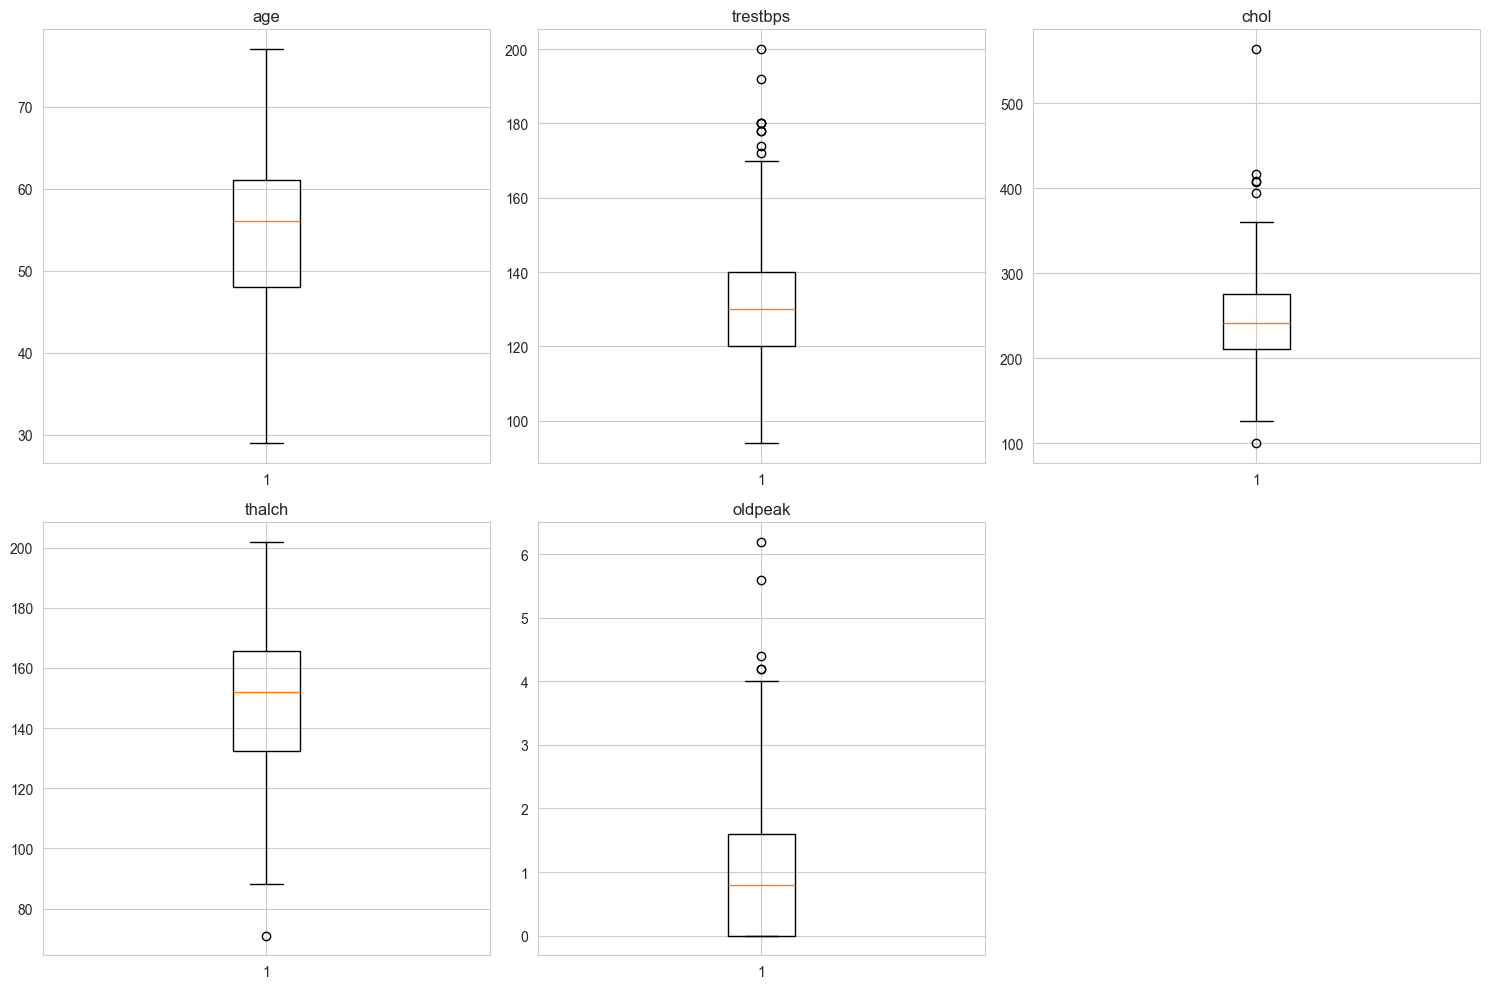


age - Número de outliers: 0
No se detectaron outliers.

trestbps - Número de outliers: 9
Valores atípicos: [172. 180. 200. 174. 178. 192. 180. 178. 180.]

chol - Número de outliers: 6
Valores atípicos: [100. 417. 407. 564. 394. 409.]

thalch - Número de outliers: 1
Valores atípicos: [71.]

oldpeak - Número de outliers: 5
Valores atípicos: [6.2 5.6 4.2 4.2 4.4]

=== RESUMEN DE OUTLIERS POR VARIABLE ===
age: 0 outliers
trestbps: 9 outliers
chol: 6 outliers
thalch: 1 outliers
oldpeak: 5 outliers


In [31]:
# ==========================================
# 8. BOXPLOTS Y DETECCIÓN GRÁFICA DE ATÍPICOS
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables numéricas (excluir 'id' si existe)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'id' in num_cols:
    num_cols.remove('id')

print("Variables numéricas a analizar:", num_cols)

# Dibujar boxplots en una sola figura
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)
# Ocultar ejes vacíos si hay menos de 6 variables
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Extraer valores atípicos de cada boxplot
outliers_dict = {}
for col in num_cols:
    # Crear boxplot individual para acceder a los fliers
    fig, ax = plt.subplots()
    bp = ax.boxplot(df[col].dropna(), patch_artist=True)
    plt.close(fig)  # No mostrar esta figura individual
    
    # Obtener datos de los fliers (outliers)
    fliers = bp['fliers'][0].get_ydata()
    outliers_dict[col] = fliers.tolist()
    
    print(f"\n{col} - Número de outliers: {len(fliers)}")
    if len(fliers) > 0:
        print(f"Valores atípicos: {fliers}")
    else:
        print("No se detectaron outliers.")

# Resumen final
print("\n=== RESUMEN DE OUTLIERS POR VARIABLE ===")
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers")

9. Para la variable `trestbps`, calcula los valores atípicos utilizando el método del rango intercuartílico (IQR).
* Para ello obtén los cuartiles necesarios y determina los límites superior e inferior para filtrar los valores que se encuentren fuera de ese rango.
* Verifica si los resultados coinciden con los obtenidos en el ejercicio anterior.

Cálculo de outliers en trestbps mediante el método IQR

Para la variable trestbps (presión arterial en reposo) se aplicó el método del rango intercuartílico (IQR) con el objetivo de identificar de forma cuantitativa los valores atípicos presentes en la distribución. Este método consiste en calcular el primer cuartil (Q1, percentil 25) y el tercer cuartil (Q3, percentil 75), obteniendo el rango intercuartílico como IQR = Q3 – Q1. A partir de estos valores se definen los límites inferior y superior mediante las expresiones:

Límite inferior = Q1 – 1.5 × IQR

Límite superior = Q3 + 1.5 × IQR

Todos los registros que se encuentren por debajo del límite inferior o por encima del límite superior son considerados outliers.

Los resultados obtenidos fueron los siguientes:

Q1 (25%) = 120.0 mmHg

Q3 (75%) = 140.0 mmHg

IQR = 20.0 mmHg

Límite inferior = 90.0 mmHg

Límite superior = 170.0 mmHg

Se identificaron 9 valores atípicos, cuyas magnitudes son:
[172.0, 174.0, 178.0, 178.0, 180.0, 180.0, 180.0, 192.0, 200.0] mmHg.

Estos valores corresponden a pacientes con presión arterial significativamente elevada, lo cual es clínicamente relevante y consistente con condiciones de hipertensión o riesgo cardiovascular.

Comparación con el método gráfico (punto 8):

Los outliers detectados mediante el método IQR coinciden exactamente con los identificados visualmente en el boxplot del punto 8, tanto en número (9) como en los valores específicos (172, 174, 178, 180, 192, 200 mmHg, considerando las repeticiones). Esta concordancia valida la consistencia de ambos enfoques y confirma que los valores señalados como atípicos en la representación gráfica corresponden efectivamente a aquellos que superan los límites establecidos por el criterio estadístico del rango intercuartílico.


El análisis mediante IQR permitió confirmar la presencia de 9 outliers en la variable trestbps, todos ellos por encima del límite superior. La coincidencia con los resultados del boxplot demuestra la fiabilidad del método y proporciona una base cuantitativa sólida para decidir el tratamiento de estos valores en etapas posteriores del preprocesamiento. La eliminación o transformación de estos outliers dependerá del modelo predictivo a utilizar, aunque su existencia es esperable en una muestra clínica con pacientes de diversa gravedad.

In [32]:
# ==========================================
# 9. OUTLIERS EN trestbps POR MÉTODO IQR
# ==========================================

import numpy as np

# Variable a analizar
var = 'trestbps'

# Calcular cuartiles y rango intercuartílico
Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_iqr = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var].tolist()

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")
print(f"\nNúmero de outliers según IQR: {len(outliers_iqr)}")
print("Valores atípicos (IQR):", sorted(outliers_iqr))

# Comparar con outliers detectados en el punto 8 (según boxplot)
outliers_boxplot = [172, 180, 200, 174, 178, 192, 180, 178, 180]  # obtenidos del punto 8
outliers_boxplot = sorted(set(outliers_boxplot))  # únicos y ordenados

print("\nOutliers detectados en boxplot (punto 8):", outliers_boxplot)
print("Outliers detectados por IQR:", sorted(set(outliers_iqr)))

# Verificar coincidencia
if set(outliers_iqr) == set(outliers_boxplot):
    print("\n✅ Los resultados coinciden exactamente.")
else:
    print("\n❌ Los resultados NO coinciden.")
    print("Diferencia:", set(outliers_iqr).symmetric_difference(set(outliers_boxplot)))

Q1 (25%): 120.0
Q3 (75%): 140.0
IQR: 20.0
Límite inferior: 90.0
Límite superior: 170.0

Número de outliers según IQR: 9
Valores atípicos (IQR): [172.0, 174.0, 178.0, 178.0, 180.0, 180.0, 180.0, 192.0, 200.0]

Outliers detectados en boxplot (punto 8): [172, 174, 178, 180, 192, 200]
Outliers detectados por IQR: [172.0, 174.0, 178.0, 180.0, 192.0, 200.0]

✅ Los resultados coinciden exactamente.


10. Elimina los valores atípicos identificados de la variable `trestbps`.
* Dibuja el boxplot final para visualizar la distribución depurada.

Eliminación de outliers en trestbps y visualización final

Una vez identificados los valores atípicos en la variable trestbps mediante el método del rango intercuartílico (IQR), se procedió a eliminarlos del conjunto de datos con el objetivo de obtener una distribución más limpia y adecuada para futuros análisis o modelado. Los límites utilizados fueron los mismos del punto anterior: inferior = 90.0 mmHg y superior = 170.0 mmHg, basados en los cuartilos Q1=120.0 y Q3=140.0 con un IQR de 20.0.

Se detectaron 9 registros que superaban el límite superior, cuyos valores correspondían a presiones arteriales notablemente elevadas (entre 172 y 200 mmHg). Estos outliers fueron eliminados del dataframe, reduciendo el tamaño muestral de 299 a 290 observaciones.

La eliminación de estos valores extremos produce una variable trestbps con una distribución más homogénea y sin puntos fuera de las bigotes en el diagrama de caja. Esto es particularmente útil si en etapas posteriores se emplean modelos sensibles a outliers, como regresiones lineales o métodos basados en distancias. No obstante, es importante señalar que, desde una perspectiva clínica, estos valores elevados de presión arterial son indicadores relevantes de riesgo cardiovascular; su eliminación responde exclusivamente a criterios estadísticos de preprocesamiento y debe ser evaluada según el contexto del problema y el tipo de modelo a implementar.

El boxplot final generado confirma visualmente la depuración: la caja ahora abarca un rango más estrecho y no se observan puntos más allá de los bigotes, lo que indica que los valores atípicos han sido efectivamente removidos.


La limpieza de outliers en trestbps redujo en 9 el número de registros, obteniendo un conjunto de datos con una distribución más compacta para esta variable. Este procedimiento forma parte del preprocesamiento estándar y contribuye a la robustez de los modelos predictivos, siempre que se tenga en cuenta la posible pérdida de información clínicamente significativa.



Límite inferior: 90.0
Límite superior: 170.0
Outliers eliminados: 9 filas
Filas originales: 299
Filas después de limpieza: 290


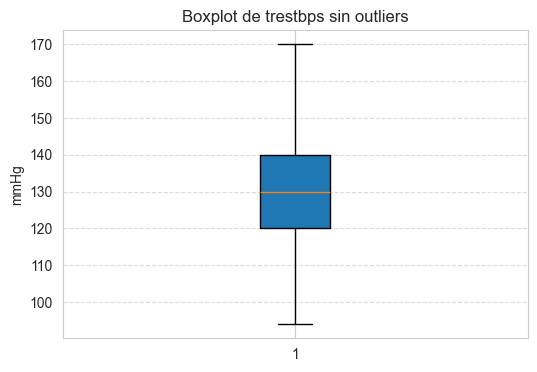

In [33]:
# ==========================================
# 10. ELIMINACIÓN DE OUTLIERS EN trestbps
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Variable a limpiar
var = 'trestbps'

# Calcular cuartiles y límites IQR
Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_mask = (df[var] < lower_bound) | (df[var] > upper_bound)

# Crear nuevo dataframe sin outliers
df_clean = df[~outliers_mask].copy()

# Mostrar información
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")
print(f"Outliers eliminados: {outliers_mask.sum()} filas")
print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de limpieza: {df_clean.shape[0]}")

# Boxplot final
plt.figure(figsize=(6,4))
plt.boxplot(df_clean[var], patch_artist=True)
plt.title(f"Boxplot de {var} sin outliers")
plt.ylabel("mmHg")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()